=====IRIS FLOWER CLASSIFICATION=====

---Import Libraries---

In [76]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
df.shape

(150, 5)

In [82]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [83]:
#Checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

This dataset contains no null values ie all the columns have values.

In [84]:
#Checking for duplicate data:
df.duplicated().sum()

3

No duplicate values in the data set.

In [85]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [86]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualizing the whole data set

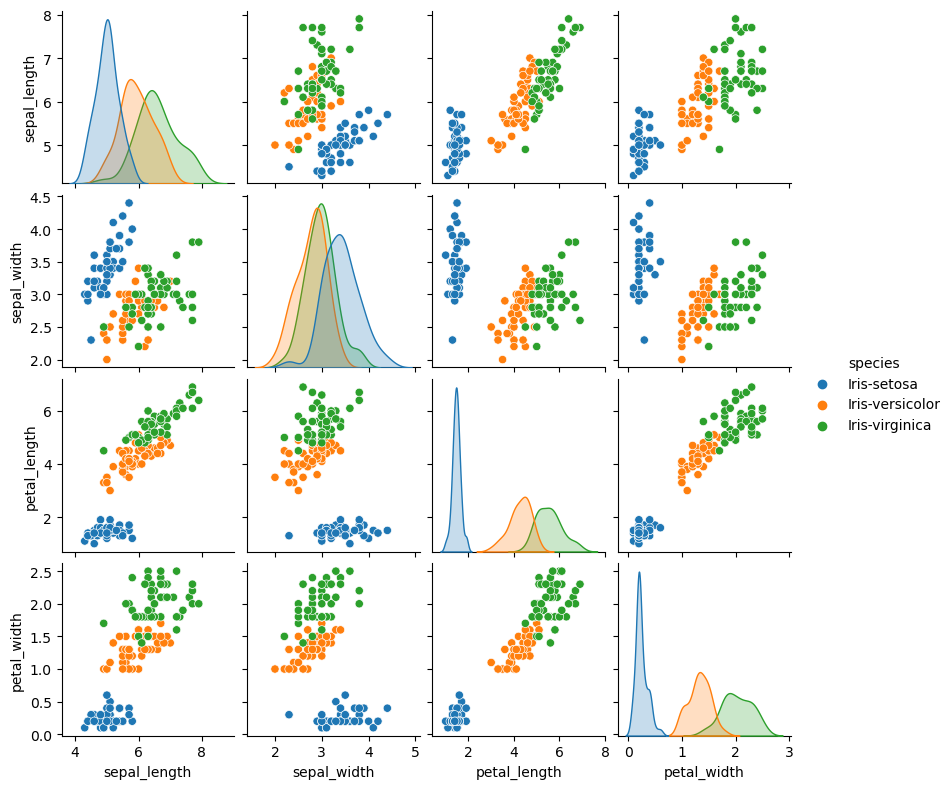

In [87]:
sns.pairplot(df, hue = 'species', height=2)

In [88]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='sepal_length')
fig.show()

fig = px.box(data_frame=df, y='sepal_width')
fig.show()

fig = px.box(data_frame=df, y='petal_length')
fig.show()

fig = px.box(data_frame=df, y='petal_width')
fig.show()

In [89]:
# Calculate the IQR
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)
iqr = q3 - q1

# Calculate the LOF and UFO
lof = q1 - 1.5 * iqr
ufo = q3 + 1.5 * iqr
print(lof)
print(ufo)
# Identify the outliers
outliers1 = df[df['sepal_width'] < lof]
outliers2 = df[df['sepal_width'] > ufo]

# Combine the outliers using concat
outliers = pd.concat([outliers1, outliers2])

# Print the outliers
print(outliers)

2.05
4.05
    sepal_length  sepal_width  petal_length  petal_width          species
60           5.0          2.0           3.5          1.0  Iris-versicolor
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

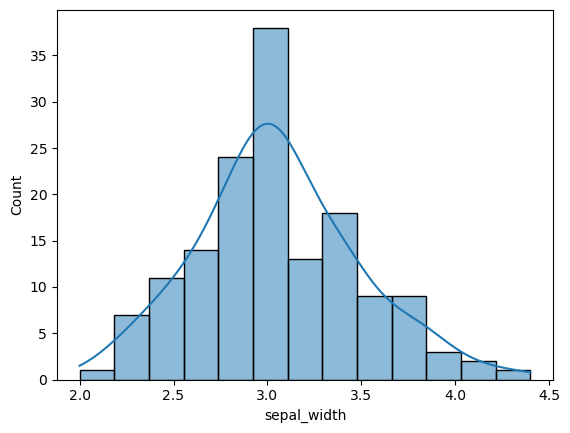

In [90]:
sns.histplot(df['sepal_width'], kde=True)

This Visualization helps in observing that 'Iris-setosa' can easily be differentiated from the other two species.

Splitting the Data and Target

In [91]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]
Y = df[['species']]

In [92]:
X

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [93]:
Y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


Splitting the data into training and testing

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

MODEL 1: Support Vector Machine Algorithm

In [95]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
model_svc = SVC(kernel='linear', C=1)

# Train the classifier
model_svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_svc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [97]:
prediction1 = model_svc.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
print(f"The accuracy score of SVM model: {accuracy_score(y_test, prediction1)*100}")

The accuracy score of SVM model: 96.66666666666667


MODEL 2: Logistic Regression

In [99]:

from sklearn.linear_model import LogisticRegression
log_reg_mod = LogisticRegression()
log_reg_mod.fit(X_train, y_train)

LogisticRegression()

In [100]:
result2 = log_reg_mod.predict(X_test)

In [101]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
print(f"The accuracy score of Logistic Regression model: {accuracy_score(y_test, result2)*100}")

The accuracy score of Logistic Regression model: 100.0


MODEL 3: Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
prediction3 = model_DTC.predict(X_test)

In [104]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
print(f"The accuracy score of Decision Tree Classifier model: {accuracy_score(y_test, prediction3)*100}")

The accuracy score of Decision Tree Classifier model: 100.0


RandomForestClassifier

In [105]:
X = df.drop('species', axis=1)
y = df['species']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [107]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [108]:
# import pipeline
from sklearn.pipeline import Pipeline

# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])
    
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
# Calculate mean accuracy
mean_accuracy = scores.mean()
    
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
    
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
    
print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)

best_model = pipeline
    
# save the best model
import pickle
pickle.dump(best_model, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9416666666666667
Test Accuracy: 1.0
